In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.impute import SimpleImputer
import seaborn as sns 
sns.set()
from matplotlib import rcParams

In [2]:
df= pd.read_csv('car_prediction.csv')

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.shape 

(19237, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [8]:
null_counts = df.isnull().sum()
print(null_counts)


ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


In [9]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
             ID  Price  Levy   Manufacturer        Model  Prod. year  \
425    45815372   7840     -  MERCEDES-BENZ        E 200        1998   
1581   45815363   8781     -         TOYOTA          Ist        2002   
1697   45732125  18503     -         TOYOTA        Prius        2010   
1972   45507765  20385     -  MERCEDES-BENZ      CLS 500        2005   
2131   45815363   8781     -         TOYOTA          Ist        2002   
...         ...    ...   ...            ...          ...         ...   
18974  45815465   2352  1273          LEXUS       IS 350        2015   
19137  45810466  15125   642      CHEVROLET      Orlando        2012   
19200  45725908  36065   640  MERCEDES-BENZ  CLA 250 AMG        2013   
19203  45761487  13485   645         TOYOTA        Prius        2011   
19210  45732939   8311   642        HYUNDAI       Sonata        2012   

        Category Leather interior Fuel type Engine volume    Mileage  \
425        Sedan               No       CNG    

In [10]:
df_no_duplicates = df.drop_duplicates()
df=df_no_duplicates
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [11]:
df = df.drop(columns=['ID'])

In [12]:
df['Levy'].value_counts()

-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [13]:
df['Levy'] = df['Levy'].replace('-', np.nan)
df['Levy'] = df['Levy'].astype(float)

In [14]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=5)
df['Levy'] = impute.fit_transform(df['Levy'].values.reshape(-1,1))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

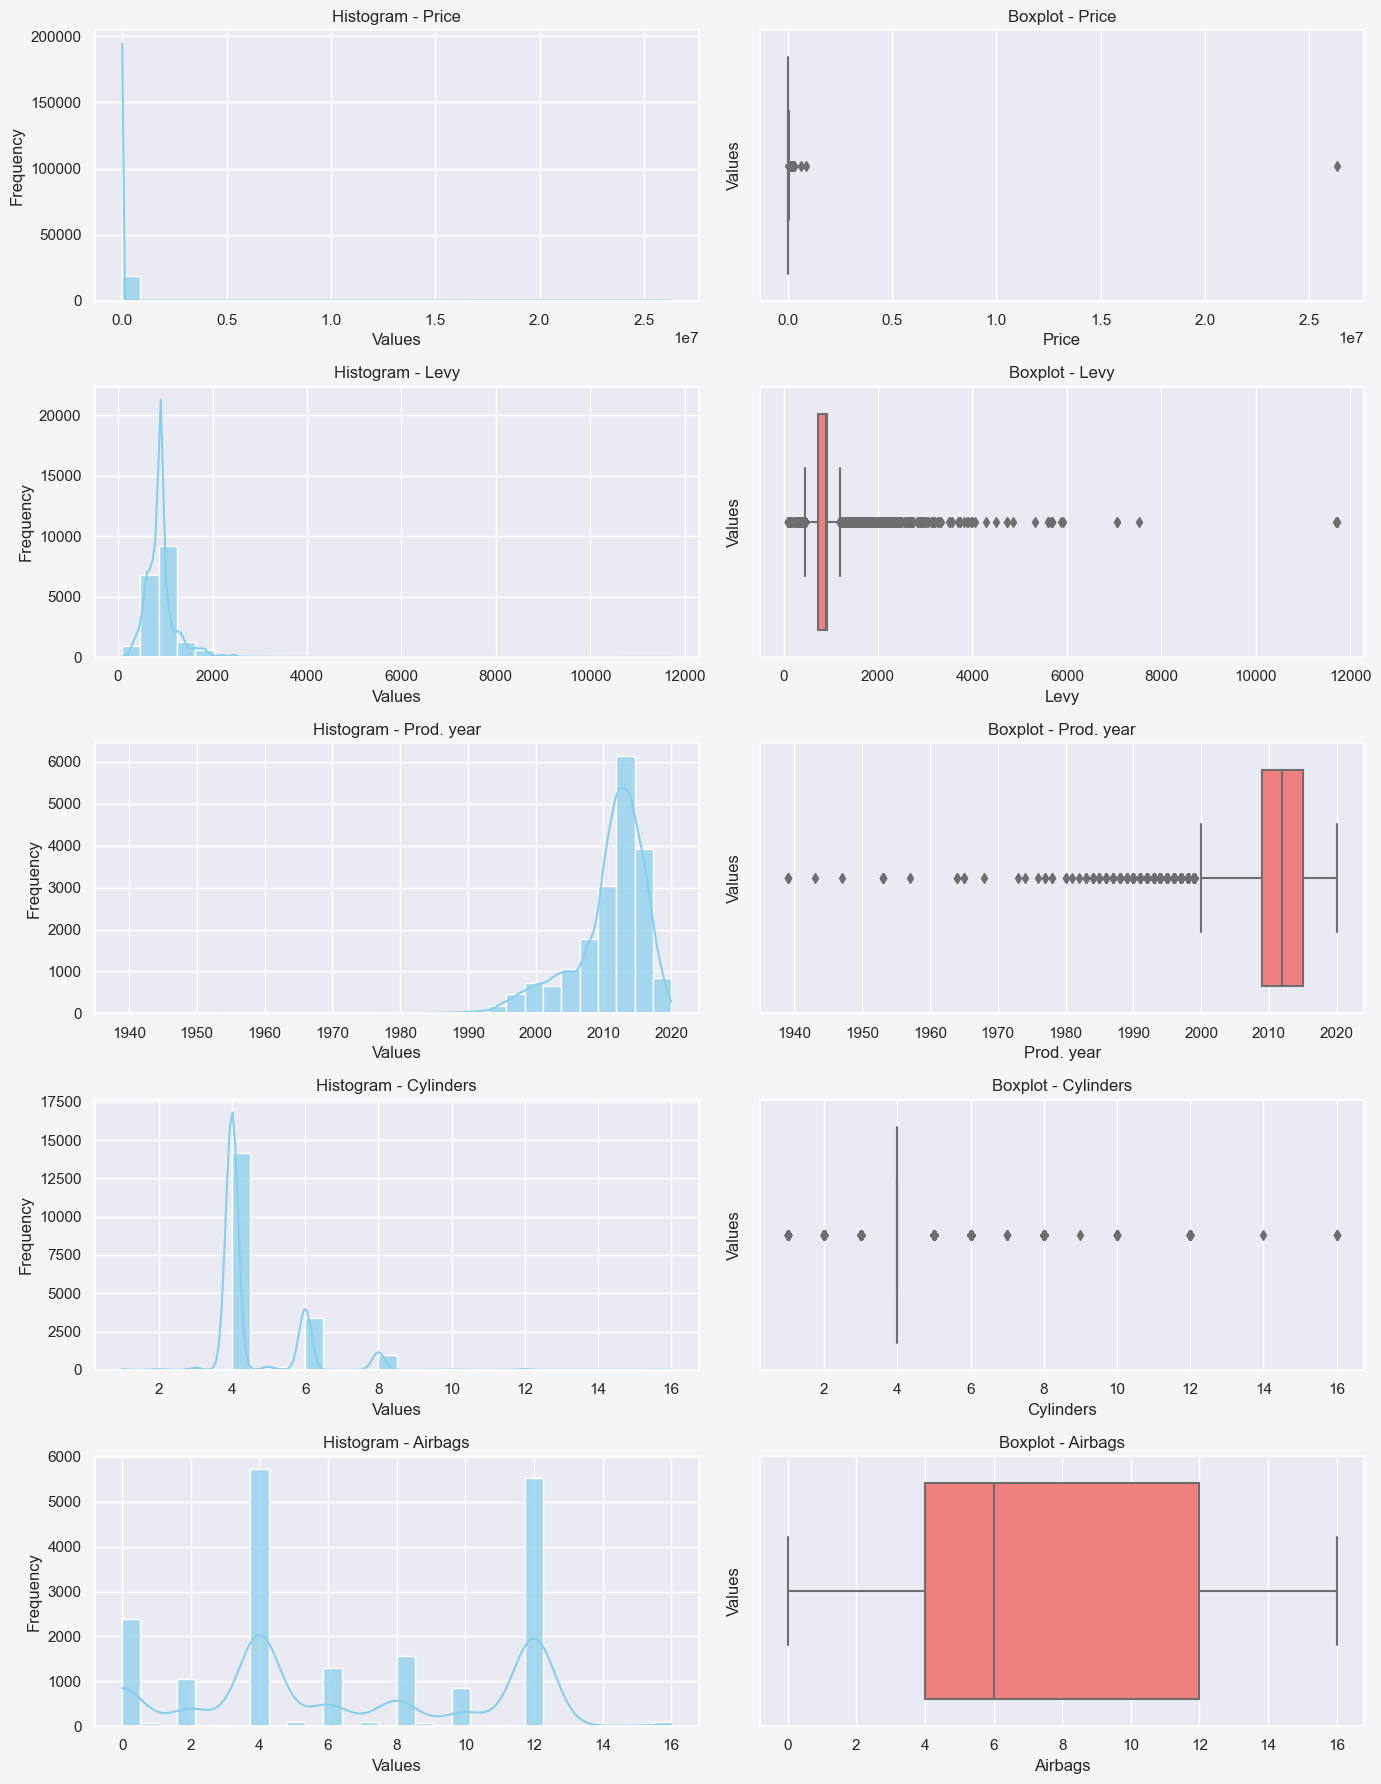

In [15]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 18), facecolor='whitesmoke')
for i, column in enumerate(numerical_columns.columns):
    sns.histplot(df[column], bins=30, color='skyblue', alpha=0.7, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram - {column}')
    axes[i, 0].set_xlabel('Values')
    axes[i, 0].set_ylabel('Frequency')
    
    sns.boxplot(x=df[column], ax=axes[i, 1], color='lightcoral', boxprops=dict(facecolor='lightcoral'))
    axes[i, 1].set_title(f'Boxplot - {column}')
    axes[i, 1].set_ylabel('Values')
    
plt.tight_layout()
plt.show()


In [16]:
price_column = df['Price']

Q1 = price_column.quantile(0.25)
Q3 = price_column.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (price_column < lower_bound) | (price_column > upper_bound)

num_outliers = np.sum(outliers)
print(f'Number of outliers: {num_outliers}')

df_no_outliers = df[~outliers]

Number of outliers: 1055


In [17]:
df=df_no_outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17869 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17869 non-null  int64  
 1   Levy              17869 non-null  float64
 2   Manufacturer      17869 non-null  object 
 3   Model             17869 non-null  object 
 4   Prod. year        17869 non-null  int64  
 5   Category          17869 non-null  object 
 6   Leather interior  17869 non-null  object 
 7   Fuel type         17869 non-null  object 
 8   Engine volume     17869 non-null  object 
 9   Mileage           17869 non-null  object 
 10  Cylinders         17869 non-null  float64
 11  Gear box type     17869 non-null  object 
 12  Drive wheels      17869 non-null  object 
 13  Doors             17869 non-null  object 
 14  Wheel             17869 non-null  object 
 15  Color             17869 non-null  object 
 16  Airbags           17869 non-null  int64 

In [18]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,906.299205,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.299205,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [20]:
df['Manufacturer'].value_counts()

TOYOTA           3502
HYUNDAI          3425
MERCEDES-BENZ    1874
FORD             1035
CHEVROLET        1021
                 ... 
PONTIAC             1
LANCIA              1
FERRARI             1
HAVAL               1
GREATWALL           1
Name: Manufacturer, Length: 61, dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9656\3264043045.py:23: UserWarning: Glyph 4321 (\N{GEORGIAN LETTER SAN}) missing from current font.
  plt.tight_layout()
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9656\3264043045.py:23: UserWarning: Glyph 4334 (\N{GEORGIAN LETTER XAN}) missing from current font.
  plt.tight_layout()
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9656\3264043045.py:23: UserWarning: Glyph 4309 (\N{GEORGIAN LETTER VIN}) missing from current font.
  plt.tight_layout()
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9656\3264043045.py:23: UserWarning: Glyph 4304 (\N{GEORGIAN LETTER AN}) missing from current font.
  plt.tight_layout()
C:\Users\KIIT\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4321 (\N{GEORGIAN LETTER SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\KIIT\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4334 (\N{GEORGIAN LETTER XAN}) missing from current font.
 

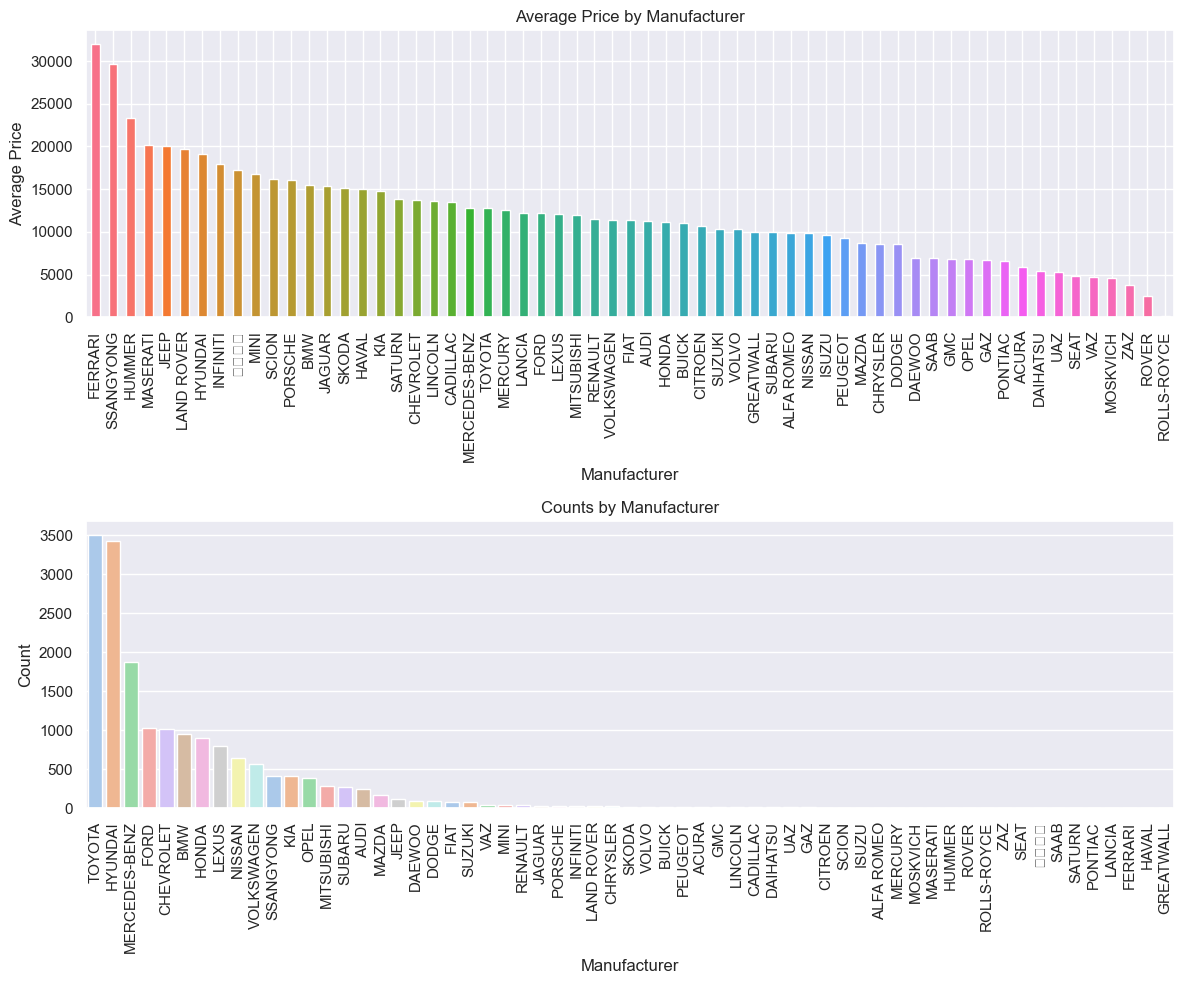

In [21]:
average_price_by_manufacturer = df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)
manufacturer_counts = df['Manufacturer'].value_counts().loc[average_price_by_manufacturer.index]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

colors_bar = sns.color_palette('husl', len(average_price_by_manufacturer))
average_price_by_manufacturer.plot(kind='bar', color=colors_bar, ax=axes[0])
axes[0].set_title('Average Price by Manufacturer')
axes[0].set_xlabel('Manufacturer')
axes[0].set_ylabel('Average Price')

colors_count = sns.color_palette('pastel')
sns.countplot(x='Manufacturer', data=df, order=df['Manufacturer'].value_counts().index, palette=colors_count, ax=axes[1])
axes[1].set_title('Counts by Manufacturer')
axes[1].set_xlabel('Manufacturer')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)  

plt.tight_layout()

plt.show()

In [22]:
df['Model'].value_counts()

Prius                     1068
Sonata                    1007
Elantra                    907
Camry                      905
E 350                      526
                          ... 
Golf 2                       1
GLK 300                      1
Musa                         1
1500,1600 Schtufenheck       1
Prius C aqua                 1
Name: Model, Length: 1498, dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9656\2164703145.py:24: UserWarning: Glyph 4307 (\N{GEORGIAN LETTER DON}) missing from current font.
  plt.tight_layout()
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9656\2164703145.py:24: UserWarning: Glyph 4312 (\N{GEORGIAN LETTER IN}) missing from current font.
  plt.tight_layout()
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9656\2164703145.py:24: UserWarning: Glyph 4310 (\N{GEORGIAN LETTER ZEN}) missing from current font.
  plt.tight_layout()
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9656\2164703145.py:24: UserWarning: Glyph 4308 (\N{GEORGIAN LETTER EN}) missing from current font.
  plt.tight_layout()
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9656\2164703145.py:24: UserWarning: Glyph 4314 (\N{GEORGIAN LETTER LAS}) missing from current font.
  plt.tight_layout()
C:\Users\KIIT\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4307 (\N{GEORGIAN LETTER DON}) missing from current font.
  fig.canvas.print_figure(bytes

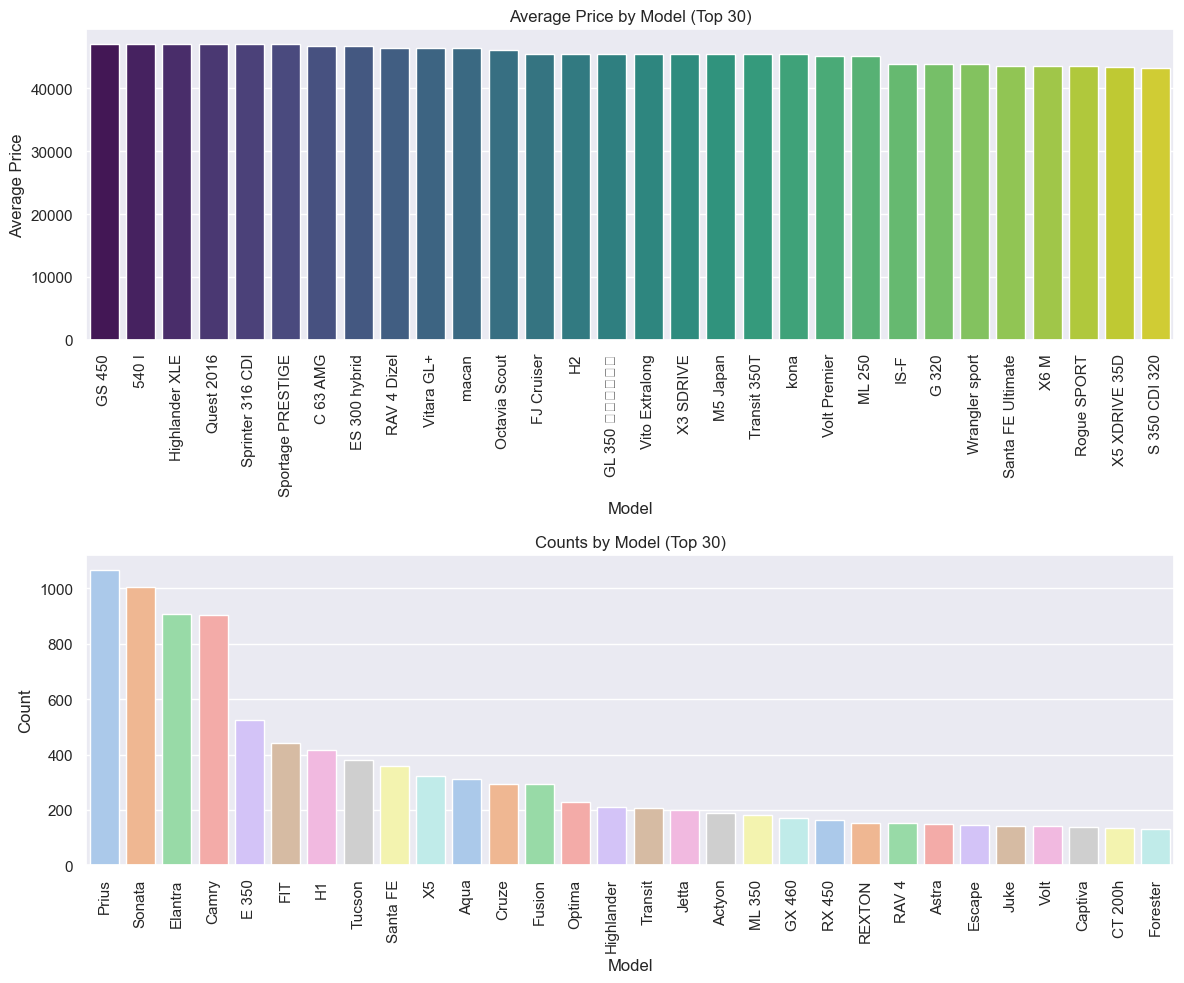

In [23]:
average_price_by_model = df.groupby('Model')['Price'].mean().sort_values(ascending=False)

top_average_price_models = average_price_by_model.head(30).index

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

colors_price = sns.color_palette('viridis', len(top_average_price_models))
sns.barplot(x='Model', y='Price', data=df[df['Model'].isin(top_average_price_models)].sort_values('Price', ascending=False),
            palette=colors_price, ax=axes[0])
axes[0].set_title('Average Price by Model (Top 30)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Average Price')
axes[0].tick_params(axis='x', rotation=90) 

top_count_models = df['Model'].value_counts().head(30).index
colors_count = sns.color_palette('pastel')
sns.countplot(x='Model', data=df[df['Model'].isin(top_count_models)].sort_values('Model'), order=top_count_models,
              palette=colors_count, ax=axes[1])
axes[1].set_title('Counts by Model (Top 30)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90) 

plt.tight_layout()

plt.show()

In [24]:
df['Category'].value_counts()

Sedan          8318
Jeep           4736
Hatchback      2781
Minivan         620
Coupe           477
Universal       339
Microbus        290
Goods wagon     227
Pickup           41
Cabriolet        29
Limousine        11
Name: Category, dtype: int64

In [25]:
df['Leather interior'].value_counts()

Yes    12737
No      5132
Name: Leather interior, dtype: int64

In [26]:
df['Fuel type'].value_counts()

Petrol            9309
Diesel            3634
Hybrid            3495
LPG                878
CNG                469
Plug-in Hybrid      83
Hydrogen             1
Name: Fuel type, dtype: int64

In [27]:
df['Engine volume'].value_counts()

2            3573
2.5          2167
1.8          1742
1.6          1428
1.5          1248
             ... 
4.2 Turbo       1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 103, dtype: int64

In [28]:
df['Turbo'] = df['Engine volume'].apply(lambda x: 1 if 'Turbo' in str(x) else 0)

df['Engine volume'] = df['Engine volume'].replace('Turbo', '', regex=True).astype(float)

df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467,906.299205,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.299205,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,0


In [29]:
df['Mileage'] = df['Mileage'].replace(' km', '', regex=True).astype(float)

In [30]:
df['Cylinders'].value_counts()

4.0     13524
6.0      3140
8.0       804
5.0       167
3.0       107
2.0        42
1.0        35
12.0       29
10.0       10
16.0        5
7.0         4
9.0         1
14.0        1
Name: Cylinders, dtype: int64

In [31]:
df['Gear box type'].value_counts()

Automatic    12593
Tiptronic     2736
Manual        1816
Variator       724
Name: Gear box type, dtype: int64

In [32]:
df['Drive wheels'].value_counts()

Front    12155
4x4       3589
Rear      2125
Name: Drive wheels, dtype: int64

In [33]:
df['Doors'].value_counts()

04-May    17028
02-Mar      729
>5          112
Name: Doors, dtype: int64

In [34]:
df['Doors'] = df['Doors'].replace({'04-May': '4-5', '02-Mar': '2-3'})
df['Doors'] = df['Doors'].astype('category')

In [35]:
df['Doors'].value_counts()

4-5    17028
2-3      729
>5       112
Name: Doors, dtype: int64

In [36]:
df['Wheel'].value_counts()

Left wheel          16420
Right-hand drive     1449
Name: Wheel, dtype: int64

In [37]:
df['Color'].value_counts()

Black            4554
White            4143
Silver           3628
Grey             2167
Blue             1314
Red               606
Green             319
Orange            248
Carnelian red     173
Brown             168
Golden            139
Beige             130
Sky blue          121
Yellow             96
Purple             39
Pink               24
Name: Color, dtype: int64

In [38]:
df['Airbags'].value_counts()

4     5245
12    5241
0     2268
8     1530
6     1258
2     1044
10     788
5      102
7       83
16      79
1       76
9       60
3       37
11      32
14      18
15       6
13       2
Name: Airbags, dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9656\3758984570.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Price', data=df, order=sorted_data, ax=axes[i], ci=None)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9656\3758984570.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Price', data=df, order=sorted_data, ax=axes[i], ci=None)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9656\3758984570.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Price', data=df, order=sorted_data, ax=axes[i], ci=None)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_9656\3758984570.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Price', data=df, order=sorted_data, ax=axes[i], ci=None)
C:\Users\KIIT\AppData\Local\

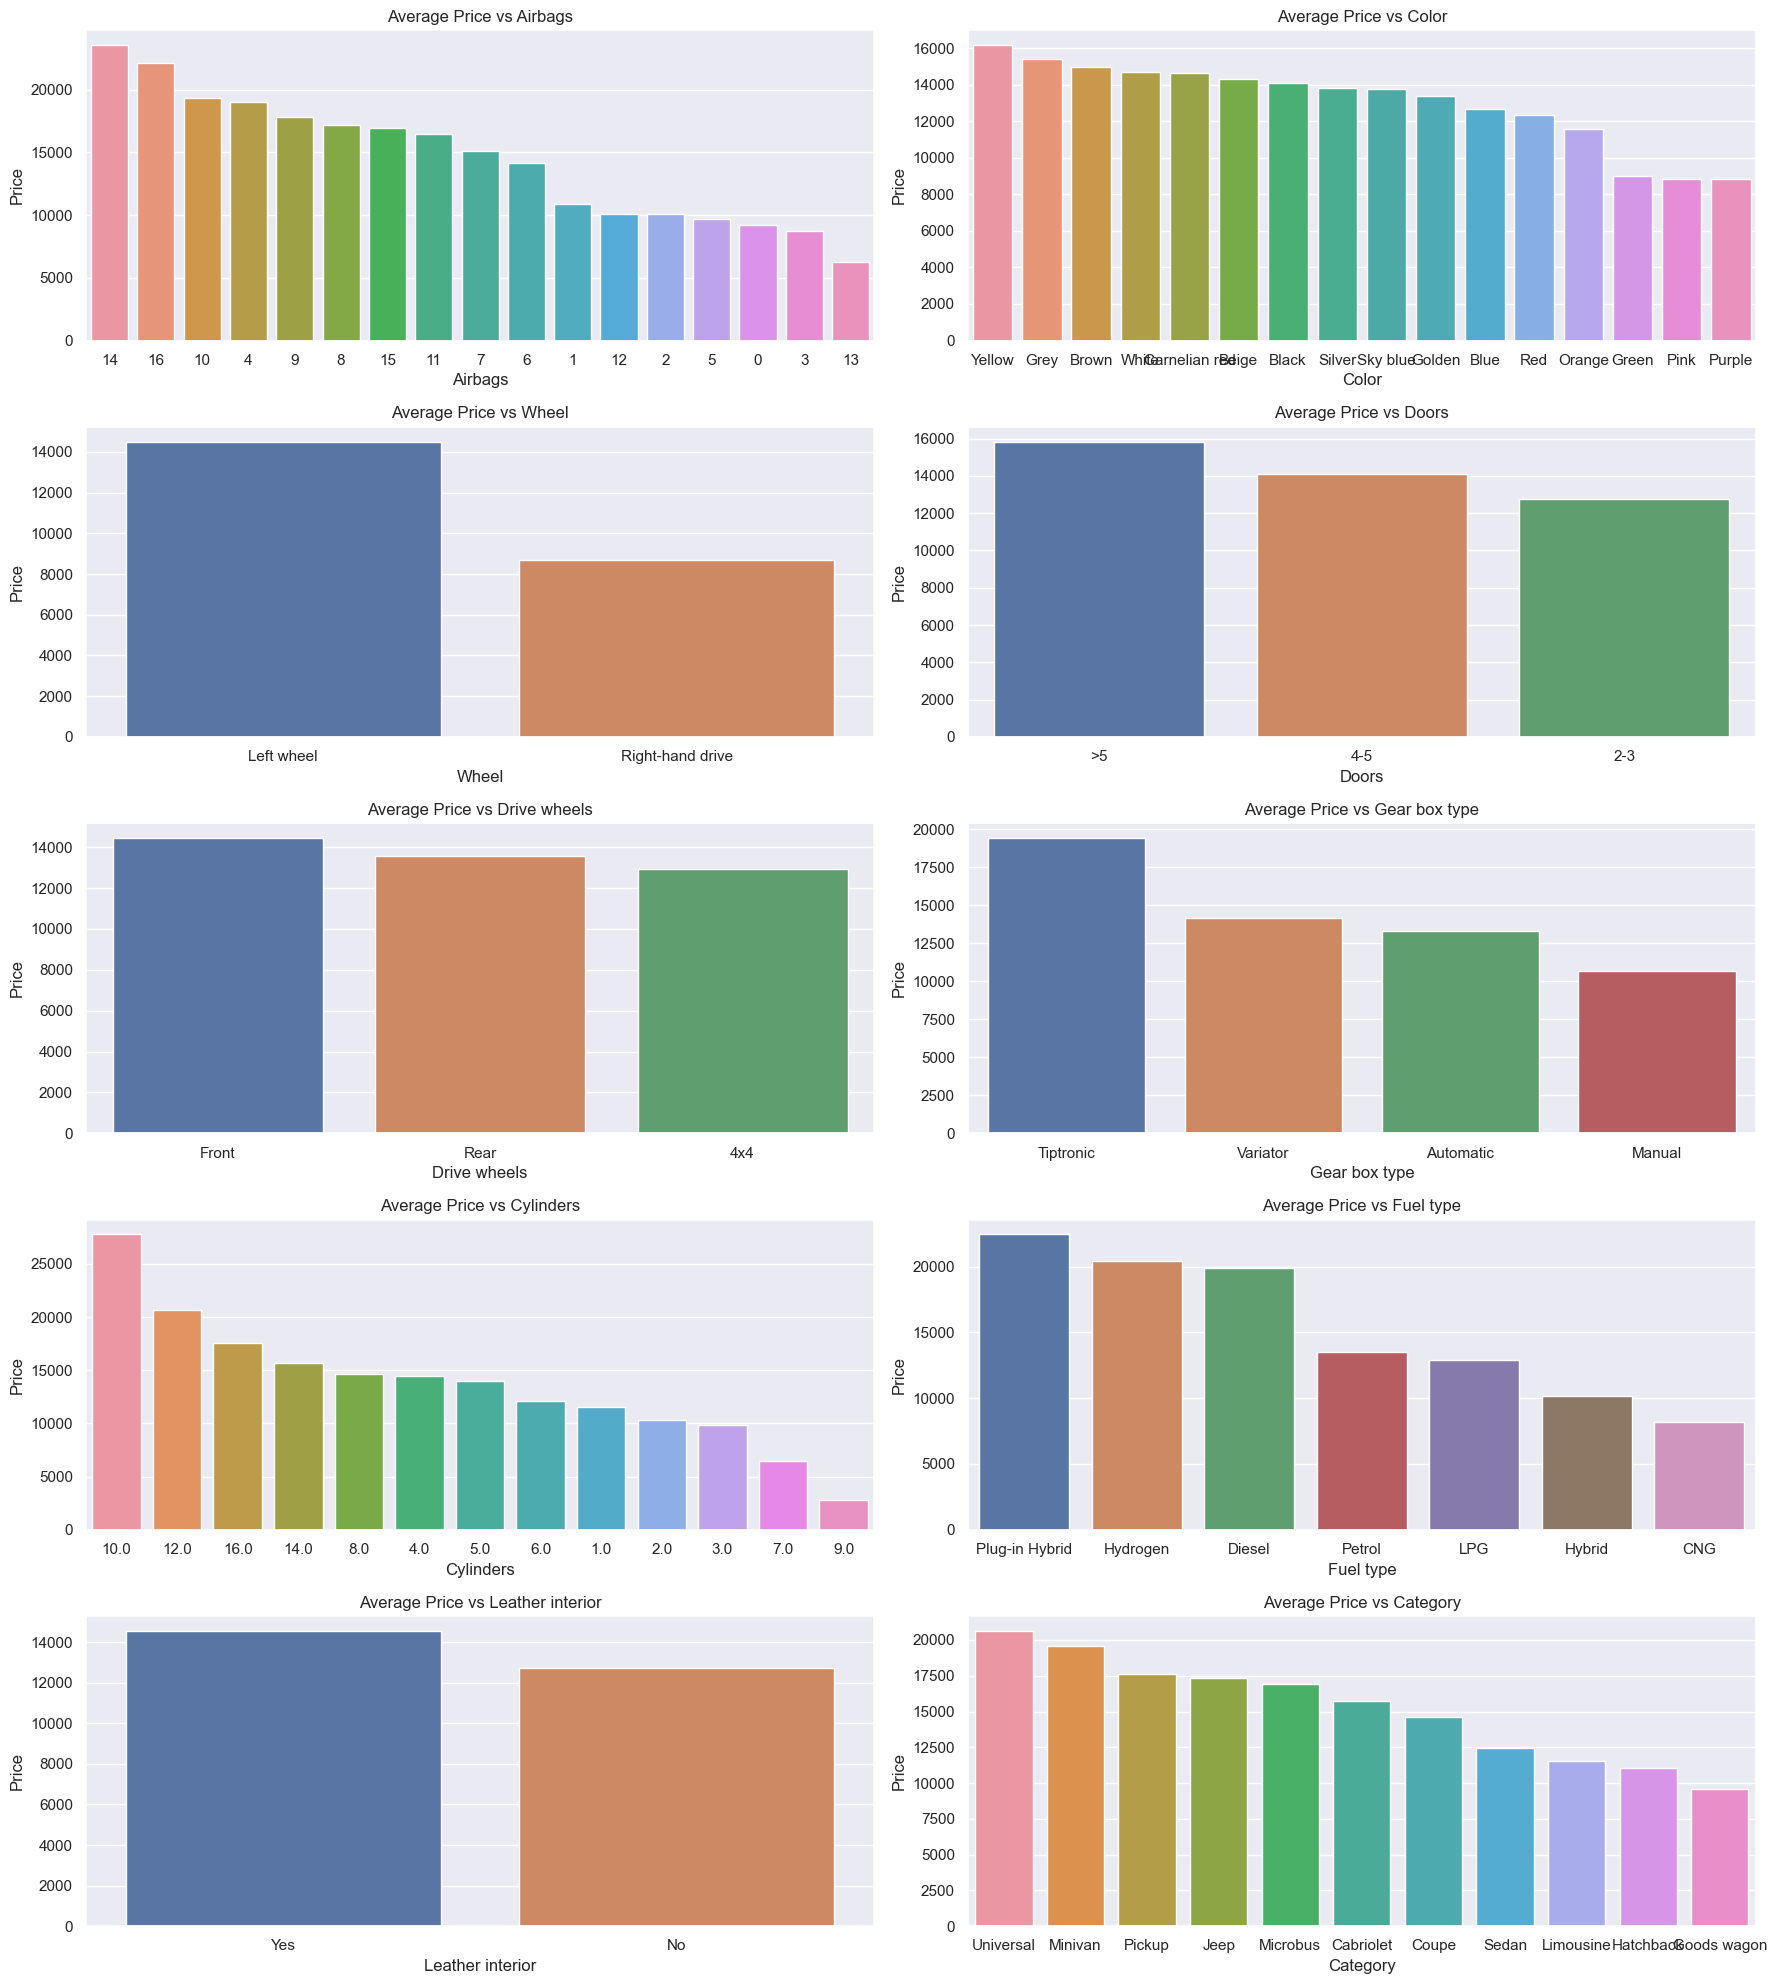

In [39]:
columns_to_plot = ['Airbags', 'Color', 'Wheel', 'Doors', 'Drive wheels', 'Gear box type', 'Cylinders', 'Fuel type', 'Leather interior', 'Category']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):

    sorted_data = df.groupby(column)['Price'].mean().sort_values(ascending=False).index
    
    sns.barplot(x=column, y='Price', data=df, order=sorted_data, ax=axes[i], ci=None)
    axes[i].set_title(f'Average Price vs {column}')

plt.tight_layout()
plt.show()

In [40]:
df['Age'] = 2024 - df['Prod. year']

df = df.drop(columns=['Prod. year'])

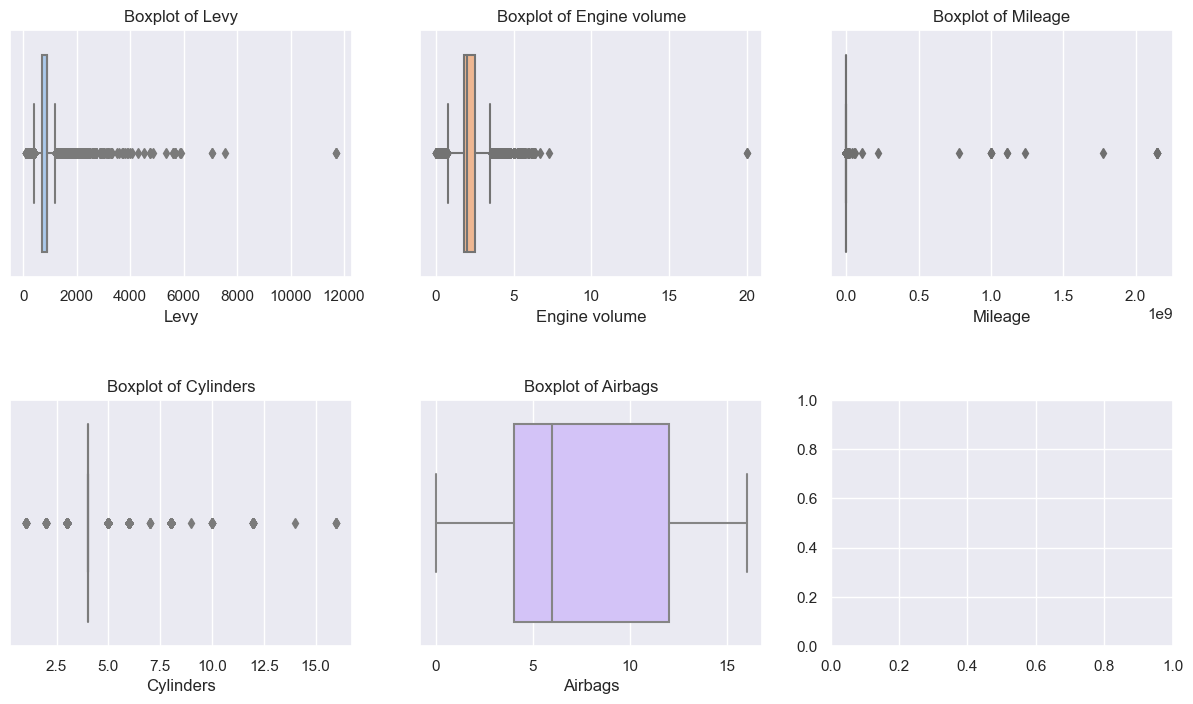

In [44]:
columns_for_boxplots = ['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

color_palette = sns.color_palette("pastel")
for i, column in enumerate(columns_for_boxplots):
    sns.boxplot(x=df[column], ax=axes[i], color=color_palette[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.show()

In [46]:
columns_to_check = ['Levy', 'Engine volume', 'Mileage','Cylinders']# Not including Airbags since distro seems normal

outlier_counts = {}

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]

    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned, outlier_count

for column in columns_to_check:
    df, count = remove_outliers_iqr(df, column)
    outlier_counts[column] = count

print("Outlier Counts:")
for column, count in outlier_counts.items():
     print(f"{column}: {count}")

Outlier Counts:
Levy: 2692
Engine volume: 335
Mileage: 547
Cylinders: 2597


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11698 entries, 2 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             11698 non-null  int64   
 1   Levy              11698 non-null  float64 
 2   Manufacturer      11698 non-null  object  
 3   Model             11698 non-null  object  
 4   Category          11698 non-null  object  
 5   Leather interior  11698 non-null  object  
 6   Fuel type         11698 non-null  object  
 7   Engine volume     11698 non-null  float64 
 8   Mileage           11698 non-null  float64 
 9   Cylinders         11698 non-null  float64 
 10  Gear box type     11698 non-null  object  
 11  Drive wheels      11698 non-null  object  
 12  Doors             11698 non-null  category
 13  Wheel             11698 non-null  object  
 14  Color             11698 non-null  object  
 15  Airbags           11698 non-null  int64   
 16  Turbo             1169

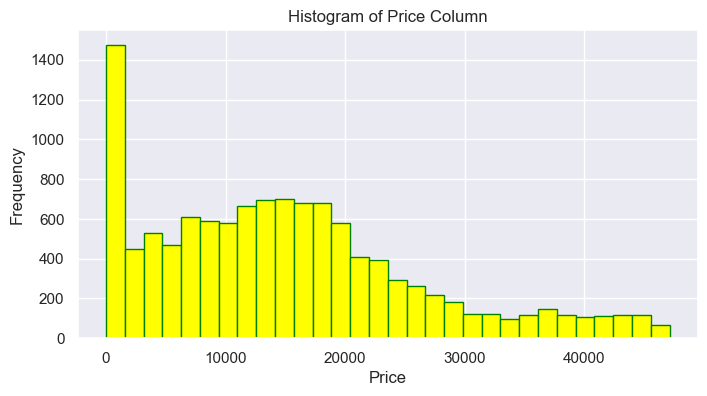

In [48]:
plt.figure(figsize=(8, 4))
plt.hist(df['Price'], bins=30, color='yellow', edgecolor='green')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [49]:
rows_with_low_price = df[df['Price'] < 500]

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
display(rows_with_low_price)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age
27,30,906.299205,TOYOTA,Prius,Sedan,No,Hybrid,1.5,169000.0,4.0,Automatic,Front,4-5,Left wheel,White,8,0,16
53,392,1017.000000,MERCEDES-BENZ,E 300,Sedan,Yes,Petrol,2.0,1600.0,4.0,Automatic,Rear,4-5,Left wheel,Black,12,0,7
68,314,779.000000,TOYOTA,Camry,Sedan,Yes,Hybrid,2.5,225510.0,4.0,Automatic,Front,4-5,Left wheel,White,12,0,11
79,220,1185.000000,FORD,Escape,Jeep,Yes,Hybrid,2.5,193614.0,4.0,Automatic,Front,4-5,Left wheel,White,0,0,15
117,94,906.299205,HONDA,FIT,Hatchback,No,Petrol,1.5,178000.0,4.0,Variator,Front,4-5,Right-hand drive,Silver,4,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,470,831.000000,HYUNDAI,Elantra,Sedan,Yes,Petrol,1.6,25635.0,4.0,Automatic,Front,4-5,Left wheel,Black,12,0,7
19218,30,906.299205,NISSAN,Note,Hatchback,No,Petrol,1.3,0.0,4.0,Automatic,Front,4-5,Right-hand drive,Green,9,0,18
19229,50,906.299205,TOYOTA,Prius,Hatchback,No,Hybrid,1.5,150000.0,4.0,Automatic,Front,4-5,Left wheel,Silver,6,0,16
19230,470,645.000000,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,307325.0,4.0,Automatic,Front,4-5,Left wheel,Silver,12,0,13


In [50]:
df = df[df['Price'] >= 500]
df

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age
2,8467,906.299205,HONDA,FIT,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4-5,Right-hand drive,Black,2,0,18
3,3607,862.000000,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4-5,Left wheel,White,0,0,13
4,11726,446.000000,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4,0,10
5,39493,891.000000,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,4-5,Left wheel,White,4,0,8
6,1803,761.000000,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,258909.0,4.0,Automatic,Front,4-5,Left wheel,White,12,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,19130,906.299205,KIA,Optima ex,Sedan,Yes,Petrol,2.4,35800.0,4.0,Automatic,Front,4-5,Left wheel,Black,12,0,10
19225,8781,1107.000000,OPEL,Combo,Goods wagon,No,Diesel,1.7,236000.0,4.0,Manual,Front,4-5,Left wheel,Beige,4,1,17
19232,8467,906.299205,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2-3,Left wheel,Silver,5,1,25
19233,15681,831.000000,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4-5,Left wheel,Red,8,0,13


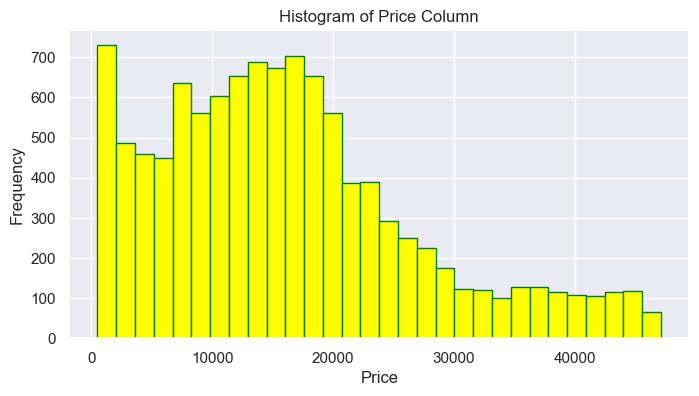

In [51]:
plt.figure(figsize=(8, 4))
plt.hist(df['Price'], bins=30, color='yellow', edgecolor='green')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [52]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Cylinders'], errors='ignore')

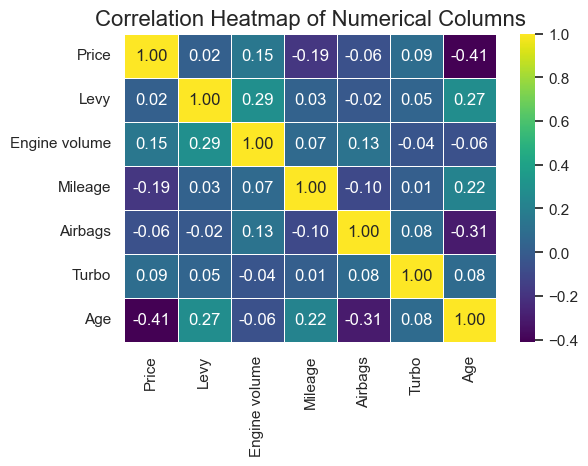

In [54]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Cylinders'], errors='ignore')

correlation_matrix = numerical_columns.corr()

sns.set(style="white")

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)

plt.show()


In [55]:
df1=df 
df2=df 

In [56]:
from sklearn.preprocessing import  OneHotEncoder

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

pd.set_option('display.max_columns', None)
df_encoded

Price         Levy  Engine volume   Mileage  Cylinders  Airbags  Turbo  \
2       8467   906.299205            1.3  200000.0        4.0        2      0   
3       3607   862.000000            2.5  168966.0        4.0        0      0   
4      11726   446.000000            1.3   91901.0        4.0        4      0   
5      39493   891.000000            2.0  160931.0        4.0        4      0   
6       1803   761.000000            1.8  258909.0        4.0       12      0   
...      ...          ...            ...       ...        ...      ...    ...   
19224  19130   906.299205            2.4   35800.0        4.0       12      0   
19225   8781  1107.000000            1.7  236000.0        4.0        4      1   
19232   8467   906.299205            2.0  300000.0        4.0        5      1   
19233  15681   831.000000            2.4  161600.0        4.0        8      0   
19234  26108   836.000000            2.0  116365.0        4.0        4      0   

       Age  Manufacturer_ALFA ROMEO  Manufacturer_AUDI  Manufacturer_BMW  \
2       18                        0                  0                 0   
3       13                        0                  0                 0   
4       10                        0                  0                 0   
5        8                        0                  0                 0   
6       14                        0                  0                 0   
...    ...                      ...                ...               ...   
19224   10                        0                  0                 0   
19225   17                        0                  0                 0   
19232   25                        0                  0                 0   
19233   13                        0                  0                 0   
19234   14                        0                  0                 0   

       Manufacturer_BUICK  Manufacturer_CADILLAC  Manufacturer_CHEVROLET  \
2                       0                      0                       0   
3                       0                      0                       0   
4                       0                      0                       0   
5                       0                      0                       0   
6                       0                      0                       0   
...                   ...                    ...                     ...   
19224                   0                      0                       0   
19225                   0                      0                       0   
19232                   0                      0                       0   
19233                   0                      0                       0   
19234                   0                      0                       0   

       Manufacturer_CHRYSLER  Manufacturer_CITROEN  Manufacturer_DAEWOO  \
2                          0                     0                    0   
3                          0                     0                    0   
4                          0                     0                    0   
5                          0                     0                    0   
6                          0                     0                    0   
...                      ...                   ...                  ...   
19224                      0                     0                    0   
19225                      0                     0                    0   
19232                      0                     0                    0   
19233                      0                     0                    0   
19234                      0                     0                    0   

       Manufacturer_DAIHATSU  Manufacturer_DODGE  Manufacturer_FIAT  \
2                          0                   0                  0   
3                          0                   0                  0   
4                          0                   0                  0   
5                      

In [57]:
for column in df_encoded.columns:
  
    if df_encoded[column].dtype == bool:
      
        df_encoded[column] = df_encoded[column].astype(int)

df_encoded

Price         Levy  Engine volume   Mileage  Cylinders  Airbags  Turbo  \
2       8467   906.299205            1.3  200000.0        4.0        2      0   
3       3607   862.000000            2.5  168966.0        4.0        0      0   
4      11726   446.000000            1.3   91901.0        4.0        4      0   
5      39493   891.000000            2.0  160931.0        4.0        4      0   
6       1803   761.000000            1.8  258909.0        4.0       12      0   
...      ...          ...            ...       ...        ...      ...    ...   
19224  19130   906.299205            2.4   35800.0        4.0       12      0   
19225   8781  1107.000000            1.7  236000.0        4.0        4      1   
19232   8467   906.299205            2.0  300000.0        4.0        5      1   
19233  15681   831.000000            2.4  161600.0        4.0        8      0   
19234  26108   836.000000            2.0  116365.0        4.0        4      0   

       Age  Manufacturer_ALFA ROMEO  Manufacturer_AUDI  Manufacturer_BMW  \
2       18                        0                  0                 0   
3       13                        0                  0                 0   
4       10                        0                  0                 0   
5        8                        0                  0                 0   
6       14                        0                  0                 0   
...    ...                      ...                ...               ...   
19224   10                        0                  0                 0   
19225   17                        0                  0                 0   
19232   25                        0                  0                 0   
19233   13                        0                  0                 0   
19234   14                        0                  0                 0   

       Manufacturer_BUICK  Manufacturer_CADILLAC  Manufacturer_CHEVROLET  \
2                       0                      0                       0   
3                       0                      0                       0   
4                       0                      0                       0   
5                       0                      0                       0   
6                       0                      0                       0   
...                   ...                    ...                     ...   
19224                   0                      0                       0   
19225                   0                      0                       0   
19232                   0                      0                       0   
19233                   0                      0                       0   
19234                   0                      0                       0   

       Manufacturer_CHRYSLER  Manufacturer_CITROEN  Manufacturer_DAEWOO  \
2                          0                     0                    0   
3                          0                     0                    0   
4                          0                     0                    0   
5                          0                     0                    0   
6                          0                     0                    0   
...                      ...                   ...                  ...   
19224                      0                     0                    0   
19225                      0                     0                    0   
19232                      0                     0                    0   
19233                      0                     0                    0   
19234                      0                     0                    0   

       Manufacturer_DAIHATSU  Manufacturer_DODGE  Manufacturer_FIAT  \
2                          0                   0                  0   
3                          0                   0                  0   
4                          0                   0                  0   
5                      

In [62]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

X = df_encoded.drop(columns=['Price','Cylinders'])
y = df_encoded['Price']

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_eval_scaled = scaler.transform(X_eval)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

models = {'RandomForest': rf_model, 'XGBoost': xgb_model}

results = {'Model': [], 'MAE (Train)': [], 'MAE (Test)': [], 'R-squared (Train)': [], 'R-squared (Test)': []}

for model_name, model in models.items():
   
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)

    y_eval_pred = model.predict(X_eval_scaled)


    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_eval = mean_absolute_error(y_eval, y_eval_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_eval = r2_score(y_eval, y_eval_pred)

    results['Model'].append(model_name)
    results['MAE (Train)'].append(mae_train)
    results['MAE (Test)'].append(mae_eval)
    results['R-squared (Train)'].append(r2_train)
    results['R-squared (Test)'].append(r2_eval)


results_df = pd.DataFrame(results)


results_df

,Model,MAE (Train),MAE (Test),R-squared (Train),R-squared (Test)
0,RandomForest,1094.507306,2911.184841,0.974053,0.809829
1,XGBoost,2548.840596,3310.678153,0.896029,0.794804


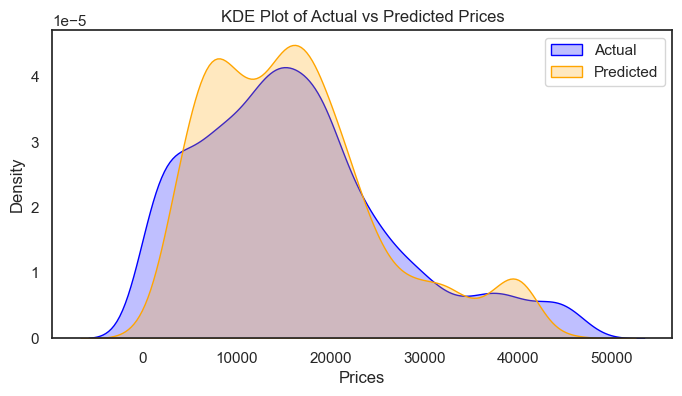

In [66]:
plot_data = pd.DataFrame({'Actual': y_eval, 'Predicted': y_eval_pred})

plt.figure(figsize=(8, 4))
sns.kdeplot(data=plot_data, x='Actual', label='Actual', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=plot_data, x='Predicted', label='Predicted', fill=True, common_norm=False, color='orange')
plt.title('KDE Plot of Actual vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.legend()
plt.show()

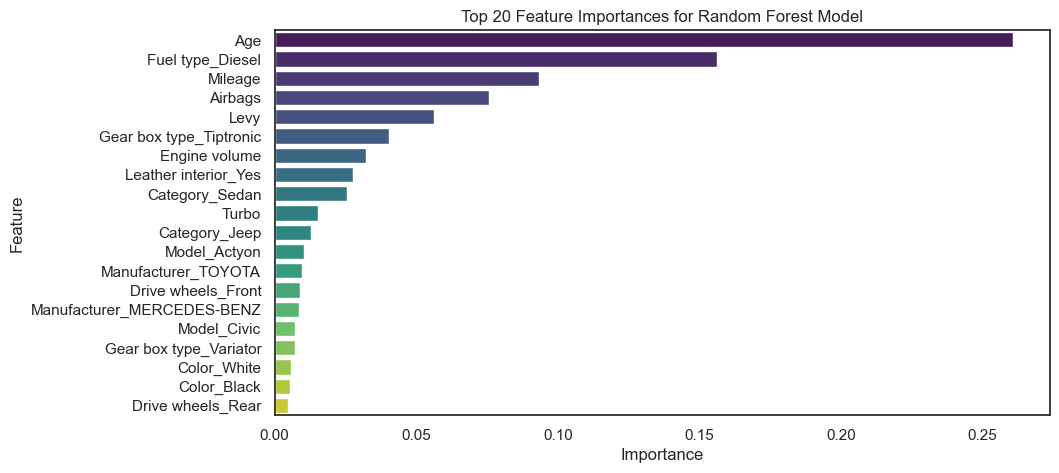

In [67]:
feature_importances = rf_model.feature_importances_

# Get the column names from the original DataFrame (X_train)
feature_names = X_train.columns

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = feature_importance_df.head(20)

# Plot the feature importances for the top 20 features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()